In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Load Dataset,Preprocessing Data

In [3]:
titanic = sns.load_dataset("titanic")

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

# handle missing data
imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

# encode
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
y = titanic["survived"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

## Decision Tree


In [8]:
model=DecisionTreeClassifier(max_depth=6)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test)*100, "%")
# classic case of overfitting

Training accuracy:  87.1589085072231 %
Testing accuracy:  78.35820895522389 %


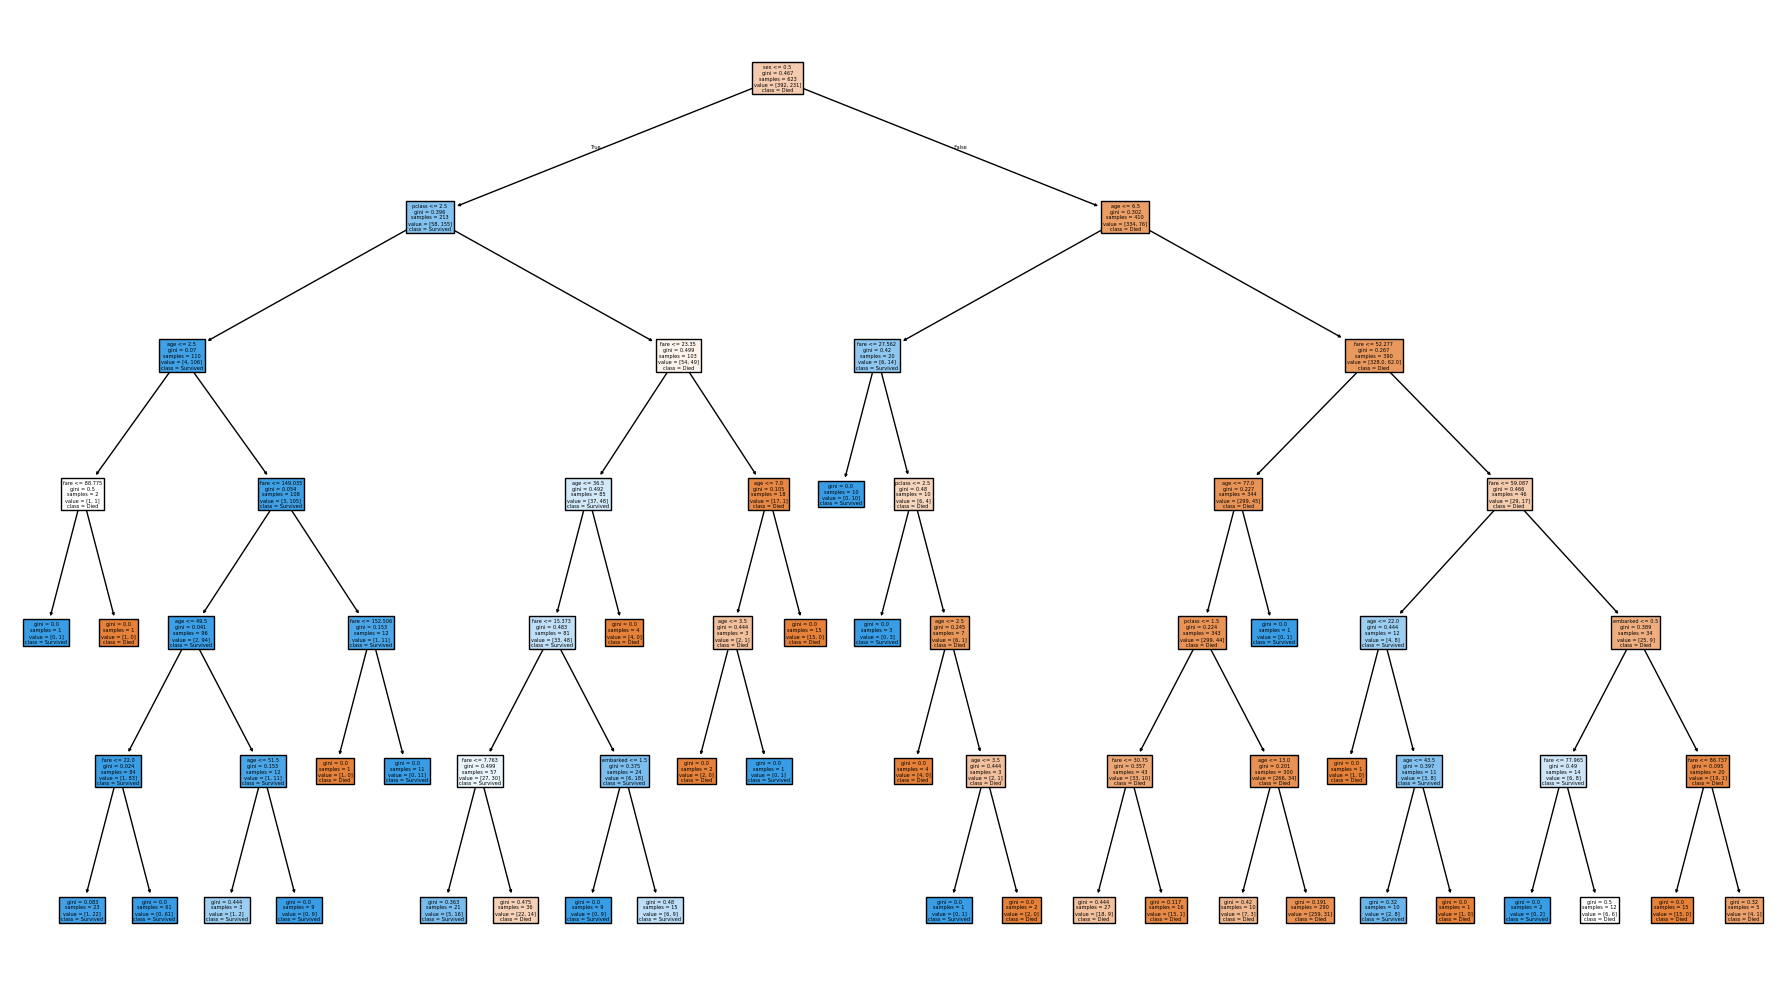

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
     model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)

plt.tight_layout()

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=501,    #Number of trees in the forest
    oob_score=True,      #Uses Out-Of-Bag samples (≈36% of data not seen by each tree)
    max_depth=4)         #Limits tree depth → prevents overfitting
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("OOB Score:",rf.oob_score_*100,"%")
print("testing accuracy:",accuracy_score(y_test,y_pred)*100,"%")

OOB Score: 81.70144462279293 %
testing accuracy: 81.71641791044776 %


## Bagging Classifier

🌲 What is Bagging (Bootstrap Aggregating)?   
Bagging improves accuracy and stability.

Bagging reduces variance by:

1.Creating multiple bootstrap samples (sampling with replacement)

2.Training independent base models

3.Aggregating predictions (majority vote / average)

👉 Random Forest = Bagging + feature randomness

👉 Bagging Classifier = only bagging, no feature randomness (unless base model does it)

## Case 1: Bagging + Decision Tree

What’s going on?    
Decision Trees are high-variance, low-bias.   
Bagging:
Trains trees on different bootstrap samples. 

WHY 1️⃣.   
Why does bagging help decision trees?     
Because decision trees are high-variance — small data changes create very different trees.  

WHY 2️⃣.   
Why does variance reduce?    
Because each tree is trained on a different bootstrap sample, so their errors cancel out when averaged.   

WHY 3️⃣.   
Why does accuracy improve?    
Because aggregating many weak-but-diverse trees produces a more robust decision boundary.  

In [18]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

bagging = BaggingClassifier(
    base_model,
    n_estimators=201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7723880597014925


 ## Case 2: Bagging with Logistic Regression

What happens?  
Bagging gives little or no improvement.   
WHY 1️⃣.   
Why doesn’t bagging help logistic regression?    
Because logistic regression is a low-variance model. 

WHY 2️⃣.   
Why are bootstrap models similar?   
Because logistic regression learns a global linear boundary, and bootstrap samples look nearly the same.   

WHY 3️⃣.  
Why does averaging fail?   
Because averaging similar models does not change bias, and bagging cannot reduce bias.   


In [19]:
from sklearn.linear_model import LogisticRegression

base_model=LogisticRegression(max_iter=1000)

bagging=BaggingClassifier(
    base_model,
    n_estimators=201
)
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_test)
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7947761194029851
